- author's code repo: <https://github.com/VeritasYin/STGCN_IJCAI-18>
- pytorch : <https://github.com/dmlc/dgl/tree/master/examples/pytorch/stgcn_wave>

- <https://arxiv.org/abs/1906.00121>

In [15]:
import torch
torch.cuda.is_available()

True

## Introduction

## Review of Existing Studies

STGCN: Spatio-Temporal Graph Convolutional Networks: A Deep Learning Framework for Traffic Forecasting 논문에서 시/공간을 고려하는 gcn 모델로 처음 제안된 방법론 (2018년 Yu와 Yin, Zhu가 제안한 모델)

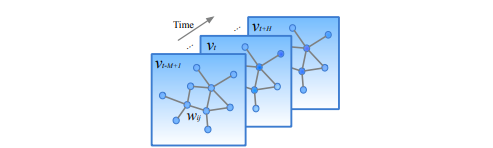

[Figure1] Graph-structured traffic data. Each $v_t$ indicates a frame of current traffic status at time step $t$, which is recorded in a graph-structured data matrix

입력 데이터는 시간 경과에 따라 촬용동니 도로 구간 교통정보 관련 스냅샷과 도로망 그래프로 구성.

공간적 측면과 시간적 측면은 '샌드위치' 로 묘사되는 방식으로 결합된다. (Temporal  사이에  시간적 특징을 추출하는 첫번째 레이어가 공간적 특징을 추출하는 두 번째 레이어로 전달된다. 그리고 이 레이터는 또 다른 시간 레이어로 전달되는 것이다.

## Proposed Method

> STGCN + EPT weights

STGCN Adjacency matrix에 지역별 일사량 ept correlation을 가중치로 준것.

EPT: the ensemble process makes it possible to design various filters, icluding nonlinear filters, which are suitable for extracting some meaningful features such as global trend, volatility, seasonality, and intervention.

- 기존 weight : $W_{ij}$ 

- ARIMA 등 기존모델의 한계점을 언급하면서, Time과 Spatial 방법을 모두 고려한 모델들 소개.


- Multi scale (ept 언급 꼭 안해도 됨)

## Experiments

> [SOLAR DATA 정리](https://pinkocto.github.io/noteda/posts/SOLAR/2023-05-01-%EC%B0%A8%EC%9B%90%EC%A1%B0%EC%82%AC.html#%EB%B0%A9%EB%B2%951-staticgraphtemporalsignal-%EB%A5%BC-%EC%9D%B4%EC%9A%A9%ED%95%98%EC%97%AC-%EB%8D%B0%EC%9D%B4%ED%84%B0-%EC%85%8B-%EB%A7%8C%EB%93%A4%EA%B8%B0)

In this example, we analyze the soloar radiation data that were hourly observed at 44 cities in South Korea^["Bukchuncheon", "Cheolwon", "Daegwanryeong", "Chuncheon", "Baeknyeongdo", "Bukgangneung", "Gangneung", "Seoul", "Incheon", "Wonju",
"Ulleungdo", "Suwon", "Seosan", "Cheongju", "Daejeon", "Chupungryeong", "Andong", "Pohang", "Daegu", "Jeonju", "Changwon",
"Gwangju", "Busan", "Mokpo", "Yeosu", "Heuksando", "Gochang", "Hongseong", "Jeju", "Gosan", "Jinju", "Gochang-gun",
Yeonggwang-gun, Gimhae-si, Sunchang-gun, Bukchang-won, Yangsan-si, Boseong-gun, Gangjin-gun, Uiryeong-gun, Hamyang-gun,
"Gwangyang-si", "Cheongsong-gun", "Gyeongju-si"] for about four months from June 1, 2022 to September 15, 2022.

| **수학기호** | **코드에 저장된 변수** | **자료형** | **차원** | **설명** |
|--------------|----------------------|------------|----------|---------|
|${\cal V}$|`data_dict['node_ids']`|dict|44|44개의 노드에 대한 설명이 있음|
|${\cal E}$|`data_dict['edges']`|list(double list)|(1892, 2)|노드들에 대한 1892개의 연결을 정의함|
|${\mathbf f}$|`data_dict['FX']`|list(double list)|(2568,44)|$v \in {\cal V}$ for $v\in{\cal V}$and $t=1,\dots,T$|

- ${\bf f}=\begin{bmatrix} {\bf f}_1\\ {\bf f}_2\\ \dots \\ {\bf f}_{2568} \end{bmatrix}=\begin{bmatrix} f(t=1,v=\tt{북춘천}) & \dots & f(t=1,v=\tt{경주시}) \\ f(t=2,v=\tt{북춘천}) & \dots & f(t=2,v=\tt{경주시}) \\ \dots & \dots & \dots \\ f(t=2568,v=\tt{북춘천}) & \dots & f(t=2568,v=\tt{경주시}) \end{bmatrix}$

- no weights >> X
- correlation by region
- ept correlation

`-` weights

The standard time interval in dataset is set to 1 hour. 
In SOLAR, the adjacency matrix of the ??graph is computed based on the correlation coefficient among solar radiation observed in 44 cities, including Bukchunchueon, Cheolwon, etc.


- $(t, X_t)$ : observation at time step $t$.
- $\cal\gamma$: scale factor
- $U_t^\tau(X_t)$: upper envelope of ensemble path transform for size parameter $\tau$

$U_t^\tau(X_t) = \underset{k\in[-\tau/2, \tau/2]}{\max}\{X_{t+k}\}-0.5\cal \gamma \tau$

The weighted adjacency matrix $W$ can be formed as,

$w_{ij} = \begin{cases}  \\ 0 & ,\text{otherwise}\end{cases}$

where $w_{ij}$ is the weight of edge which is decided by ept correlation (the ept correlation between 44 cities)

**correlation by region**

Hourly solar radiation of observatories from South Korean  for 4 months. Vertices represent 44 cities and the weighted edges represent the strength of the relationship. The target variable allows regression operations. (The weight is the correlation coefficient of solar radiation by region.)

**ept correlation**

Hourly solar radiation of observatories from South Korean  for 4 months. Vertices represent 44 cities and the weighted edges represent the strength of the relationship. The target variable allows regression operations. The weight is the EPT correlation coefficient of solar radiation by region

### 10 iter rslt

In [2]:
import pandas as pd
import numpy as np

In [9]:
v1_50 = pd.read_csv('./simulation_results/A/stgcn/50.csv')
v1_100 = pd.read_csv('./simulation_results/A/stgcn/100.csv')
v1_150 = pd.read_csv('./simulation_results/A/stgcn/150.csv')

In [10]:
v1 = pd.concat([v1_50, v1_100, v1_150])
v1

,dataset,method,normal,lags,nof_filters,epoch,mse(train),mse(test),calculation_time
0,data2,STGCN,X,4,16,50,0.184666,0.168772,298.709778
1,data2,STGCN,X,4,32,50,0.184967,0.170560,302.935171
2,data2,STGCN,X,4,64,50,0.183801,0.169246,315.828636
3,data2,STGCN,X,8,16,50,0.189229,0.165215,309.634520
4,data2,STGCN,X,8,32,50,0.193490,0.167097,311.973553
...,...,...,...,...,...,...,...,...,...
115,data2,STGCN,X,12,32,150,0.201391,0.177662,1306.056505
116,data2,STGCN,X,12,64,150,0.188375,0.165186,1348.935959
117,data2,STGCN,X,24,16,150,0.225323,0.195045,1199.328551
118,data2,STGCN,X,24,32,150,0.217955,0.194223,1223.021271


In [7]:
v2_50 = pd.read_csv('./simulation_results/A/eptstgcn/50.csv')
v2_100 = pd.read_csv('./simulation_results/A/eptstgcn/100.csv')
v2_150 = pd.read_csv('./simulation_results/A/eptstgcn/150.csv')

In [8]:
v2 = pd.concat([v2_50, v2_100, v2_150])
v2

,dataset,method,normal,lags,nof_filters,epoch,mse(train),mse(test),calculation_time
0,data2,EPT-STGCN,NaN,4,16,50,0.192152,0.173403,430.805053
1,data2,EPT-STGCN,NaN,4,32,50,0.184834,0.166629,553.995057
2,data2,EPT-STGCN,NaN,4,64,50,0.186183,0.169907,568.342531
3,data2,EPT-STGCN,NaN,8,16,50,0.200127,0.171658,484.037182
4,data2,EPT-STGCN,NaN,8,32,50,0.203025,0.173270,416.375737
...,...,...,...,...,...,...,...,...,...
115,data2,EPT-STGCN,NaN,12,32,150,0.196776,0.173983,1290.014739
116,data2,EPT-STGCN,NaN,12,64,150,0.197882,0.170004,1347.436289
117,data2,EPT-STGCN,NaN,24,16,150,0.222497,0.188107,1199.523731
118,data2,EPT-STGCN,NaN,24,32,150,0.255760,0.204602,1231.037348
